In [1]:
# 기본
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 경고 뜨지 않게 설정
import warnings
warnings.filterwarnings('ignore')

# 그래프 설정
plt.rcParams['font.family'] = 'Malgun Gothic'
# plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['font.size'] = 16
plt.rcParams['figure.figsize'] = 20, 10
plt.rcParams['axes.unicode_minus'] = False

# 데이터 전처리 알고리즘
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

# 학습용과 검증용으로 나누는 함수
from sklearn.model_selection import train_test_split

# 교차 검증
# 지표를 하나만 설정할 경우
from sklearn.model_selection import cross_val_score
# 지표를 하나 이상 설정할 경우
from sklearn.model_selection import cross_validate
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold

# 모델의 최적의 하이퍼파라미터를 찾기 위한 도구
from sklearn.model_selection import GridSearchCV

# 평가함수
# 분류용
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score

# 회귀용
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

# 머신러닝 알고리즘 - 분류
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import VotingClassifier

# 머신러닝 알고리즘 - 회귀
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import VotingRegressor

# 차원축소
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# 군집화
from sklearn.cluster import KMeans
from sklearn.cluster import MeanShift
from sklearn.cluster import estimate_bandwidth

# 시간 측정을 위한 시간 모듈
import datetime

# 주식 정보를 읽어오기 위한 라이브러리
from pandas_datareader import data

### 데이터를 읽어온다.


In [2]:
drink = pd.read_csv('data/drinks.csv')
drink


,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,AS
1,Albania,89,132,54,4.9,EU
2,Algeria,25,0,14,0.7,AF
3,Andorra,245,138,312,12.4,EU
4,Angola,217,57,45,5.9,AF
...,...,...,...,...,...,...
188,Venezuela,333,100,3,7.7,SA
189,Vietnam,111,2,1,2.0,AS
190,Yemen,6,0,0,0.1,AS
191,Zambia,32,19,4,2.5,AF


- country : 국가정보
- beer_servings : beer 소비량
- spirit_servings : spirit 소비량
- wine_servings : wine 소비량
- total_liters_of_pure_alcohol : 총 알콜 소비량
- contient : 대륙정보


In [3]:
drink.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Data columns (total 6 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   country                       193 non-null    object 
 1   beer_servings                 193 non-null    int64  
 2   spirit_servings               193 non-null    int64  
 3   wine_servings                 193 non-null    int64  
 4   total_litres_of_pure_alcohol  193 non-null    float64
 5   continent                     170 non-null    object 
dtypes: float64(1), int64(3), object(2)
memory usage: 9.2+ KB


### 각 컬럼의 상관관계를 살펴본다.

In [4]:
# beer_sesrving과 wine_servings 두 특성간의 상관계수를 계산한다.
# pearson 은 상관계수를 계산하는 함수
corr = drink[['beer_servings', 'wine_servings']].corr(method='pearson')
corr


,beer_servings,wine_servings
beer_servings,1.000000,0.527172
wine_servings,0.527172,1.000000


In [5]:
# 여러 특성간의 상관 관계를 확인한다.
cols = ['beer_servings', 'spirit_servings', 'wine_servings', 
        'total_litres_of_pure_alcohol']

corr = drink[cols].corr(method='pearson')
corr


,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
beer_servings,1.000000,0.458819,0.527172,0.835839
spirit_servings,0.458819,1.000000,0.194797,0.654968
wine_servings,0.527172,0.194797,1.000000,0.667598
total_litres_of_pure_alcohol,0.835839,0.654968,0.667598,1.000000


### 상관관계 시각화

In [6]:
# heat map
# sns.heatmap(corr, annot=True)

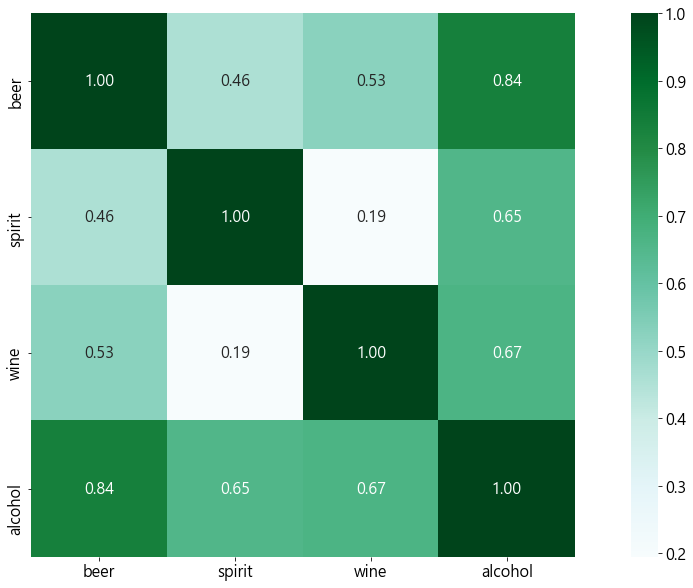

In [7]:
# heat map
# 표시할 컬림 이름 목록
cols_view = ['beer', 'spirit', 'wine', 'alcohol']

# 첫번째 : 상관계수 값들
# xticklabels : x축 컬럼 이름
# yticklabels : y축 컬럼 이름
# square : True를 넣어주면 정사각형 모양으로 나온다.
# annot : True를 넣어주면 네모 중앙에 값이 표시된다.
# fmt : 네모 중앙에 표시할 값 양식, .2f : 소수점 이하 두 자리까지
# cmap : 색상값. 아래에 정리되어 있는 색상 문자열을 넣어준다.
# https://chrisalbon.com/python/data_visualization/seaborn_color_palettes
sns.heatmap(corr, xticklabels=cols_view, yticklabels=cols_view,
           square=True, annot=True, fmt='.2f', cmap='BuGn')

plt.show()



### 결측치 처리

In [8]:
drink.isna().sum()

country                          0
beer_servings                    0
spirit_servings                  0
wine_servings                    0
total_litres_of_pure_alcohol     0
continent                       23
dtype: int64

In [9]:
# contient 에 23개의 결측가 있다고 나오지만 사실은 NA라는 문자열이 있다.
# 결측치로 측정된 부분을 NA라는 문자열로 변경한다.
drink['continent'].fillna('NA', inplace=True)
drink.isna().sum()


country                         0
beer_servings                   0
spirit_servings                 0
wine_servings                   0
total_litres_of_pure_alcohol    0
continent                       0
dtype: int64

In [10]:
# 결측치를 채운 데이터를 저장한다.
drink.to_csv('data/drink_test.csv')


In [11]:
test_df=pd.read_csv('data/drink_test.csv')
test_df.isna().sum()

Unnamed: 0                       0
country                          0
beer_servings                    0
spirit_servings                  0
wine_servings                    0
total_litres_of_pure_alcohol     0
continent                       23
dtype: int64

In [12]:
# 대륙별 수를 구한다.
drink['continent'].value_counts()


AF    53
EU    45
AS    44
NA    23
OC    16
SA    12
Name: continent, dtype: int64

### 조사 대상에 대한 대륙별 비율을 확인한다.


In [13]:
# 그래프를 그리기 위한 데이터를 준비한다.
# 대륙별 국가 수

fraces=drink['continent'].value_counts()
fraces

AF    53
EU    45
AS    44
NA    23
OC    16
SA    12
Name: continent, dtype: int64

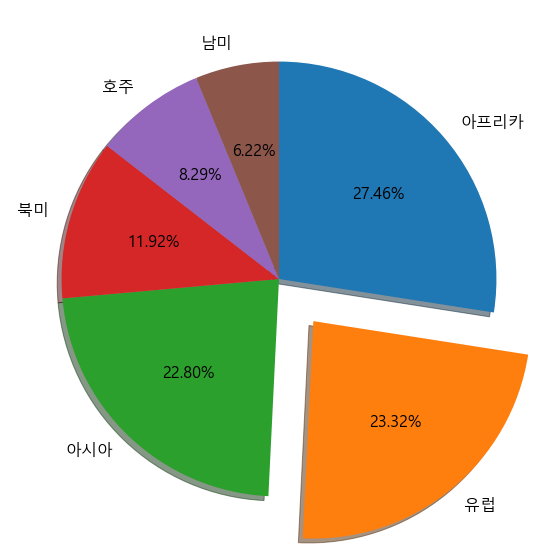

In [14]:
# plt.pie(fraces,labels=fraces.index)

# 대륙이름
names = ['아프리카', '유럽', '아시아', '북미', '호주', '남미']

# 파이조각이 튀어나올 비율
explode = 0, 0.25, 0, 0, 0, 0

# 첫 번째 : 데이터
# labels : 각 파이에 이름
# autopct : 파이 내에 퍼센트가 표시될 양식. 생갹하면 퍼센트가 표시되지
# 않는다.
# shadow : True를 주면 그림자가 생긴다.
# explode : 튀어나올 조각 설정(비율)
# startangle : 시작 각도 값. 3시방향이 0이며 시계 반대 방향으로 적용
# counterclock : 원을 그릴 방향. True(기본)은 시계 반대 방향. False면
# 시계방향
plt.pie(fraces, labels=names, autopct='%.2f%%', shadow=True, explode=explode,
       startangle=90, counterclock=False)
plt.show()



- 대륙별 spirit_servings의 평균, 최소, 최대, 총합을 구한다.
- 전체 평균보다 많은 알콜을 섭취하는 대륙을 구한다.
- 평균 beer_servings가 가장 높은 대륙을 구한다.


In [15]:
# 대륙별로 그룹을 묶어 spririt_servings를 가져온다.
a1 = drink.groupby('continent')['spirit_servings']
# a1.describe()

# agg : 구하고자 하는 통값들을 나열해 주면 한번에 가져온다.
# 통계함수의 이름을 문자열로 설정해준다.

a1.agg(['mean','min','max','sum'])

,mean,min,max,sum
continent,,,,
AF,16.339623,0,152,866
AS,60.840909,0,326,2677
EU,132.555556,0,373,5965
NA,165.739130,68,438,3812
OC,58.437500,0,254,935
SA,114.750000,25,302,1377


### 전체 평균보다 많은 알콜을 섭취하는대륙을 구한다.

In [16]:
a1=drink['total_litres_of_pure_alcohol'].mean()
a1

4.717098445595855

In [17]:
a2=drink.groupby('continent')['total_litres_of_pure_alcohol'].mean()
a2

continent
AF    3.007547
AS    2.170455
EU    8.617778
NA    5.995652
OC    3.381250
SA    6.308333
Name: total_litres_of_pure_alcohol, dtype: float64

In [18]:
a3 = a2 >a1
a3

continent
AF    False
AS    False
EU     True
NA     True
OC    False
SA     True
Name: total_litres_of_pure_alcohol, dtype: bool

In [19]:
a4=a2[a3]
a4.index

Index(['EU', 'NA', 'SA'], dtype='object', name='continent')

In [20]:
# 알콜 섭취량 전체 평균을 구한다.
total_mean = drink['total_litres_of_pure_alcohol'].mean()
total_mean


4.717098445595855

In [21]:
# 대륙별 알콜 섭취량 평균
a1 = drink.groupby('continent')['total_litres_of_pure_alcohol']
continent_mean = a1.mean()
continent_mean


continent
AF    3.007547
AS    2.170455
EU    8.617778
NA    5.995652
OC    3.381250
SA    6.308333
Name: total_litres_of_pure_alcohol, dtype: float64

In [22]:
# 전체 평균보다 높은 대륙만 가져온다.
a1 = continent_mean >= total_mean
continent_over_mean = continent_mean[a1]
continent_over_mean


continent
EU    8.617778
NA    5.995652
SA    6.308333
Name: total_litres_of_pure_alcohol, dtype: float64

### 평균 beer_servings가 가장 높은 대륙을 구한다.


In [23]:
# 대륙별 beer_servings 평균을 구한다.
a1 = drink.groupby('continent')['beer_servings']
a2 = a1.mean()
a2

continent
AF     61.471698
AS     37.045455
EU    193.777778
NA    145.434783
OC     89.687500
SA    175.083333
Name: beer_servings, dtype: float64

In [24]:
a2=drink.groupby('continent')['beer_servings'].mean()
a3= a2.sort_values(ascending=False)
print(f'대륙명: {a3.index[0]}')
print(f'평균값: {a3[0]}')

대륙명: EU
평균값: 193.77777777777777


In [25]:
# 가장 큰 값을 가지고 있는 인덱스를 추출한다.
beer_continent = a2.idxmax()

print(f'대륙명 : {beer_continent}')
print(f'평균값 : {a2[beer_continent]}')


대륙명 : EU
평균값 : 193.77777777777777


### 대륙별 spirit_servings의 평균, 최소, 최대, 합계값을 시각화


In [26]:
# 대륙별 spirit_servings의 평균, 최소, 최대, 합계값을 구한다.
a1 = drink.groupby('continent')['spirit_servings']
result = a1.agg(['mean', 'min', 'max', 'sum'])
result

,mean,min,max,sum
continent,,,,
AF,16.339623,0,152,866
AS,60.840909,0,326,2677
EU,132.555556,0,373,5965
NA,165.739130,68,438,3812
OC,58.437500,0,254,935
SA,114.750000,25,302,1377


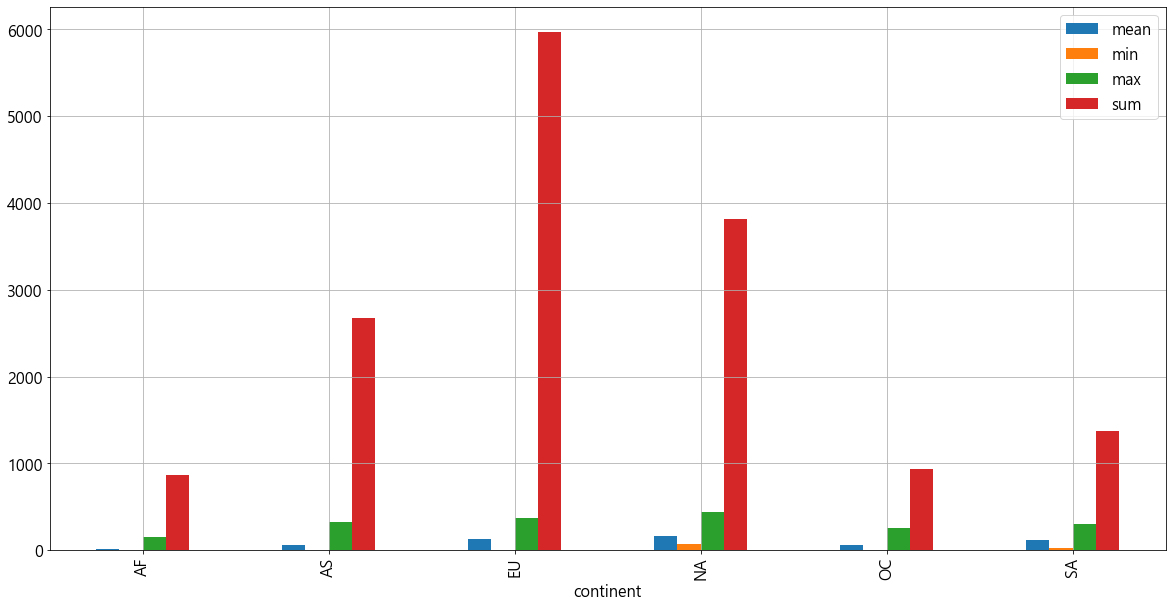

In [27]:
result.plot.bar()
plt.grid()
plt.show()

### 대륙별 total_litres_of_pure_alcohol평균을 시각화 한다.

In [28]:
drink

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,AS
1,Albania,89,132,54,4.9,EU
2,Algeria,25,0,14,0.7,AF
3,Andorra,245,138,312,12.4,EU
4,Angola,217,57,45,5.9,AF
...,...,...,...,...,...,...
188,Venezuela,333,100,3,7.7,SA
189,Vietnam,111,2,1,2.0,AS
190,Yemen,6,0,0,0.1,AS
191,Zambia,32,19,4,2.5,AF


In [29]:
# 각 대륙별 total_litres_of_pure_alchohol의 평균을 구한다
a1 = drink.groupby('continent')['total_litres_of_pure_alcohol']
continent_mean = a1.mean()
continent_mean


continent
AF    3.007547
AS    2.170455
EU    8.617778
NA    5.995652
OC    3.381250
SA    6.308333
Name: total_litres_of_pure_alcohol, dtype: float64

In [30]:
# 전체 평균을 구해 추가한다.
total_mean=drink['total_litres_of_pure_alcohol'].mean()
continent_mean['mean']=total_mean
continent_mean

continent
AF      3.007547
AS      2.170455
EU      8.617778
NA      5.995652
OC      3.381250
SA      6.308333
mean    4.717098
Name: total_litres_of_pure_alcohol, dtype: float64

In [31]:
# x 축에 들어갈 값(대륙의 수 만큼.. 0, 1, 2...)
x_pos = list(range(len(continent_mean)))
x_pos



[0, 1, 2, 3, 4, 5, 6]

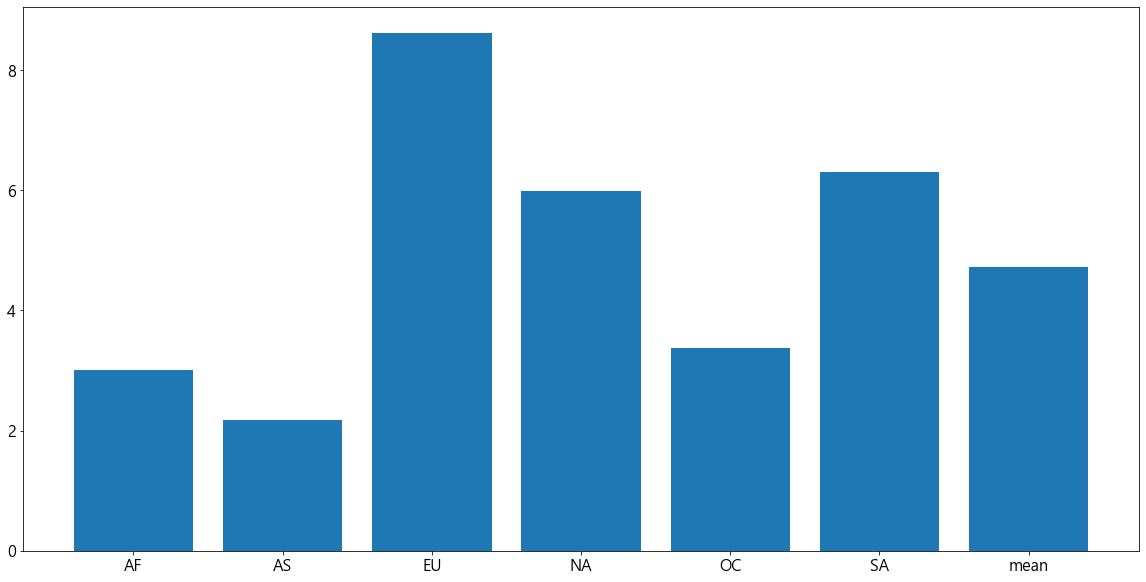

In [32]:
plt.bar(x_pos,continent_mean.values,align='center')

#x축에 대륙별 이름을 설정해 준다.
plt.xticks(x_pos,continent_mean.index)

plt.show()

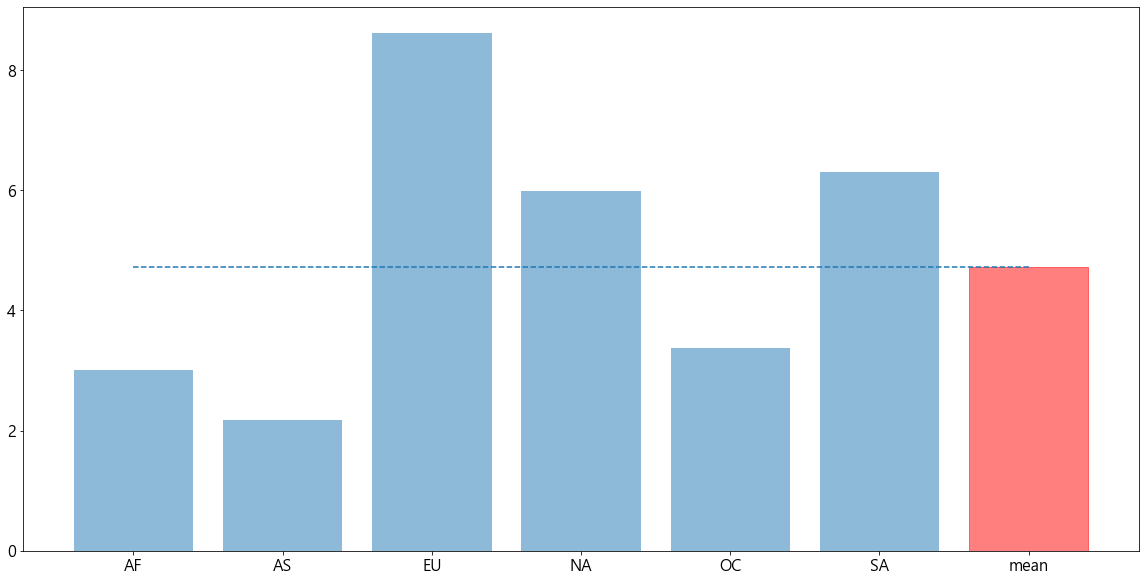

In [40]:
bar_list = plt.bar(x_pos, continent_mean.values, align='center', alpha=0.5)#alpha=0.5 : 색상 연하게

# 제일 마지막 막대의 색상을 붉은색으로 바꾼다.
bar_list[-1].set_color('r')

# 평균값을 기반으로 선을 그린다.
# ([시작점 x 위치, 종료점 y 위치], [시작점 y 값, 종료점 y값], '선종류')
plt.plot([0, 6], [total_mean, total_mean], '--')

# x축 에 대륙별 이름을 설정해준다.
# 첫번째 : 막그래프 인덱스가 들어있는 요소, 각 막대에 적용할 이름
plt.xticks(x_pos, continent_mean.index)

plt.show()

